In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Base project path
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"

# Folder structure
folders = [
    "project_docs",
    "data/raw_videos",
    "data/processed_frames",
    "models/yolo",
    "outputs/violation_records",
    "notebooks",


]

# Create folders
for folder in folders:
    path = os.path.join(PROJECT_ROOT, folder)
    os.makedirs(path, exist_ok=True)

# Create placeholder files
files = [
    "README.md",
    "project_docs/problem_statement.md",
    "project_docs/project_workflow.md",
    "project_docs/system_architecture.md",
    "project_docs/violation_rules.md",
    "requirements/requirements.txt"
]

for file in files:
    file_path = os.path.join(PROJECT_ROOT, file)
    if not os.path.exists(file_path):
        open(file_path, "w").close()

print("Project folder structure created successfully at:")
print(PROJECT_ROOT)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Project folder structure created successfully at:
/content/drive/MyDrive/Smart_Traffic_Violation_Detection


In [ ]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
DOC_PATH = os.path.join(PROJECT_ROOT, "project_docs/problem_statement.md")

problem_statement = """
# Smart Traffic Violation Detection System

## Problem Statement
Modern cities have installed a large number of traffic cameras at road intersections and highways.
However, most of these cameras only record video footage and require manual monitoring by traffic authorities.
Manual monitoring is time-consuming, error-prone, and does not scale with increasing traffic volume.

Traffic rule violations such as riding without a helmet and jumping red lights are major causes of road accidents.
Due to limited manpower, many violations go unnoticed, reducing the effectiveness of traffic law enforcement.

## Objective
The objective of this project is to build an AI-based system that automatically analyzes traffic camera video feeds
and detects traffic violations in real time. The system focuses on detecting:
- No Helmet violations for two-wheelers
- Red Light signal violations

The system generates visual evidence and structured violation records that can be used by traffic authorities
for monitoring, analysis, and further action.

## Scope
This project focuses on:
- Automated detection of violations from video
- Evidence generation (image, timestamp, violation type)
- Structured storage of violation records

Fine generation and legal enforcement are considered external systems and are not implemented in this project.
"""

with open(DOC_PATH, "w") as f:
    f.write(problem_statement.strip())

print("Problem statement created at:")
print(DOC_PATH)


Problem statement created at:
/content/drive/MyDrive/Smart_Traffic_Violation_Detection/project_docs/problem_statement.md


In [ ]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
RULES_PATH = os.path.join(PROJECT_ROOT, "project_docs/violation_rules.md")

violation_rules = """
# Traffic Violation Rules

## Rule 1: No Helmet Violation
### Description
A no-helmet violation occurs when a two-wheeler rider is detected without wearing a helmet.

### Logical Condition
IF:
- A two-wheeler (bike or scooter) is detected
AND
- No helmet is detected on the rider's head region

THEN:
- Mark as "No Helmet Violation"

### Notes
- Helmet detection is performed within the bounding box of the detected two-wheeler.
- This rule applies only to two-wheelers.

---

## Rule 2: Red Light Violation
### Description
A red light violation occurs when a vehicle crosses the stop line while the traffic signal is red.

### Logical Condition
IF:
- Traffic signal state is RED
AND
- Vehicle crosses the predefined stop line region

THEN:
- Mark as "Red Light Violation"

### Notes
- The stop line is defined as a fixed region in the camera view.
- Vehicle movement is tracked across consecutive frames to detect crossing.

---

## Rule Enforcement Principles
- Rules are deterministic and explainable.
- No probabilistic decision is used for violation judgment.
- All violations must have visual evidence (image + timestamp).
"""

with open(RULES_PATH, "w") as f:
    f.write(violation_rules.strip())

print("Violation rules documented at:")
print(RULES_PATH)


Violation rules documented at:
/content/drive/MyDrive/Smart_Traffic_Violation_Detection/project_docs/violation_rules.md


In [ ]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
WORKFLOW_PATH = os.path.join(PROJECT_ROOT, "project_docs/project_workflow.md")

workflow_text = """
# Project Workflow: Smart Traffic Violation Detection System

## Phase 0: Problem Understanding & Scope
- Define the traffic problem being solved
- Identify violations to detect (No Helmet, Red Light)
- Define system inputs and outputs

## Phase 1: Data & Video Collection
- Collect traffic videos from CCTV footage or public sources
- Store raw videos in the data/raw_videos directory

## Phase 2: Video Preprocessing
- Convert video streams into individual frames
- Resize and clean frames for further processing
- Store processed frames in data/processed_frames

## Phase 3: Object Detection
- Use a YOLO-based deep learning model
- Detect vehicles, helmets, and traffic signals
- Generate bounding boxes and labels

## Phase 4: Vehicle Tracking
- Track detected vehicles across consecutive frames
- Assign temporary IDs to vehicles

## Phase 5: Violation Rule Engine
- Apply predefined traffic rules
- Detect No Helmet and Red Light violations
- Ensure decisions are deterministic and explainable

## Phase 6: Evidence Generation
- Capture violation frames
- Attach timestamp and location metadata
- Store evidence images

## Phase 7: Violation Record Storage
- Store structured violation records
- Save data in CSV or database format

## Phase 8: Dashboard & Visualization
- Display detected violations
- Show statistics and visual evidence

## Phase 9: Testing & Validation
- Test system on different traffic videos
- Validate reliability and robustness

## Phase 10: Documentation & Resume
- Finalize documentation
- Prepare resume-ready project explanation
"""

with open(WORKFLOW_PATH, "w") as f:
    f.write(workflow_text.strip())

print("Project workflow documented at:")
print(WORKFLOW_PATH)


Project workflow documented at:
/content/drive/MyDrive/Smart_Traffic_Violation_Detection/project_docs/project_workflow.md


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Video file exists: True
FPS: 30.0
Total Frames: 346
Resolution: 720 x 720


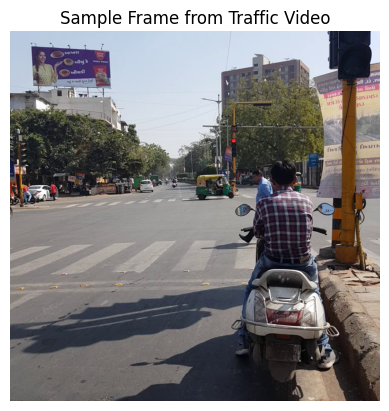

In [ ]:
# Phase 1: load traffic video, Validate input traffic video and preview a sample frame

from google.colab import drive
import cv2
import os
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
VIDEO_PATH = os.path.join(PROJECT_ROOT, "data/raw_videos/traffic_video_01.mp4")

print("Video file exists:", os.path.exists(VIDEO_PATH))

cap = cv2.VideoCapture(VIDEO_PATH)

fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print("FPS:", fps)
print("Total Frames:", frame_count)
print("Resolution:", f"{width} x {height}")

ret, frame = cap.read()
cap.release()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title("Sample Frame from Traffic Video")
    plt.axis("off")
else:
    print("Failed to read frame from video")

In [ ]:
# Phase 1: Confirm video reusability and log basic metadata

import cv2
import os

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
VIDEO_PATH = os.path.join(PROJECT_ROOT, "data/raw_videos/traffic_video_01.mp4")

cap = cv2.VideoCapture(VIDEO_PATH)

video_metadata = {
    "fps": cap.get(cv2.CAP_PROP_FPS),
    "total_frames": int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
    "width": int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
    "height": int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
}

cap.release()

print("Phase 1 Video Metadata:")
for k, v in video_metadata.items():
    print(f"{k}: {v}")


Phase 1 Video Metadata:
fps: 30.0
total_frames: 346
width: 720
height: 720


In [ ]:
# Phase 2: Extract frames from traffic video

import cv2
import os

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
VIDEO_PATH = os.path.join(PROJECT_ROOT, "data/raw_videos/traffic_video_01.mp4")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

os.makedirs(OUTPUT_DIR, exist_ok=True)

cap = cv2.VideoCapture(VIDEO_PATH)

frame_interval = 5  # save every 5th frame to reduce redundancy
frame_count = 0
saved_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_interval == 0:
        frame_filename = f"frame_{saved_count:04d}.jpg"
        frame_path = os.path.join(OUTPUT_DIR, frame_filename)
        cv2.imwrite(frame_path, frame)
        saved_count += 1

    frame_count += 1

cap.release()

print("Total frames read from video:", frame_count)
print("Total frames saved:", saved_count)
print("Frames saved in:", OUTPUT_DIR)


Total frames read from video: 346
Total frames saved: 70
Frames saved in: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/data/processed_frames/traffic_video_01


Sample frames selected for inspection:
frame_0048.jpg
frame_0005.jpg
frame_0017.jpg
frame_0065.jpg
frame_0042.jpg


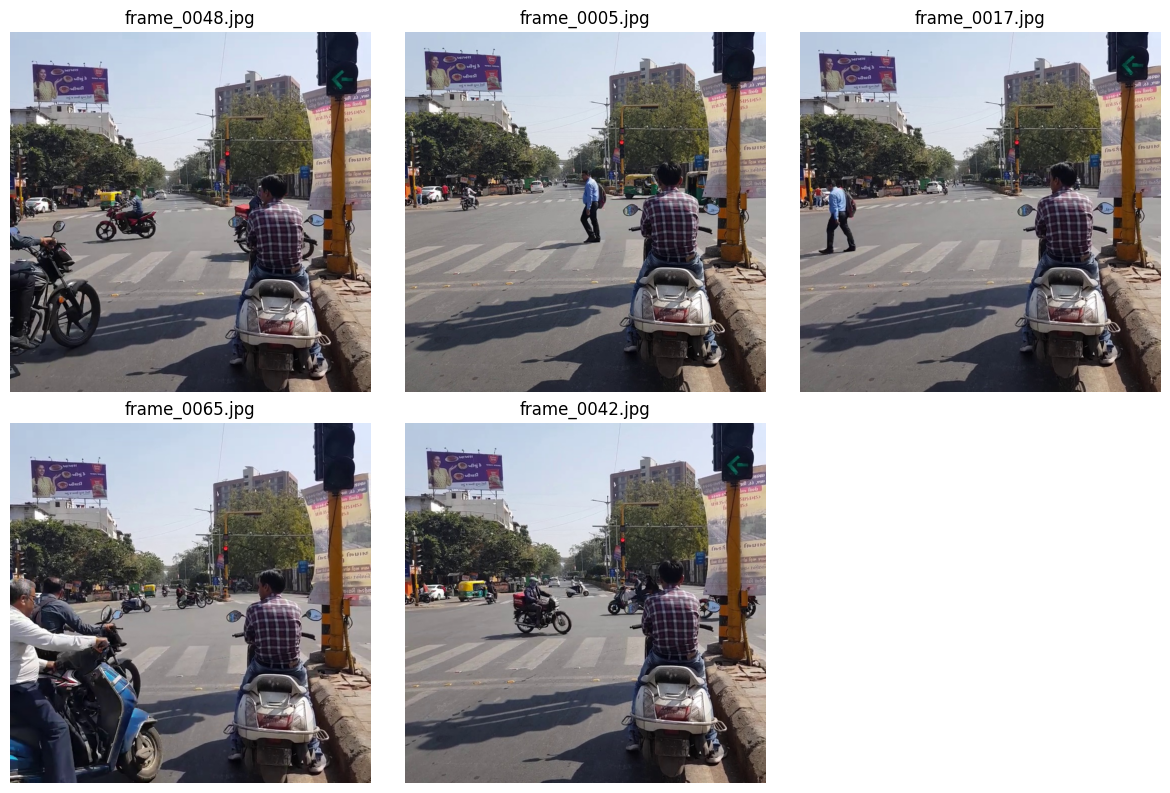

In [ ]:
# Phase 2: Visual inspection of extracted frames

import os
import cv2
import random
import matplotlib.pyplot as plt

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

frame_files = sorted(os.listdir(FRAMES_DIR))
sample_frames = random.sample(frame_files, min(5, len(frame_files)))

print("Sample frames selected for inspection:")
for f in sample_frames:
    print(f)

plt.figure(figsize=(12, 8))

for i, frame_name in enumerate(sample_frames):
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i + 1)
    plt.imshow(frame_rgb)
    plt.title(frame_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Phase 3 Setup: Install Ultralytics YOLO library required for object detection
# This cell is only for installing YOLO dependencies.

!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.5 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Frames selected for YOLO detection:
frame_0048.jpg
frame_0000.jpg
frame_0047.jpg

0: 640x640 4 persons, 2 cars, 3 motorcycles, 1 truck, 1 traffic light, 373.2ms
Speed: 12.5ms preprocess, 373.2ms inference, 42.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 persons, 4 cars, 1 traffic light, 155.6ms
Speed: 3.0ms preprocess, 155.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 persons, 5 motorcycles, 1 truck, 2 traffic lights, 164.4ms
Speed: 2.8ms preprocess, 164.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


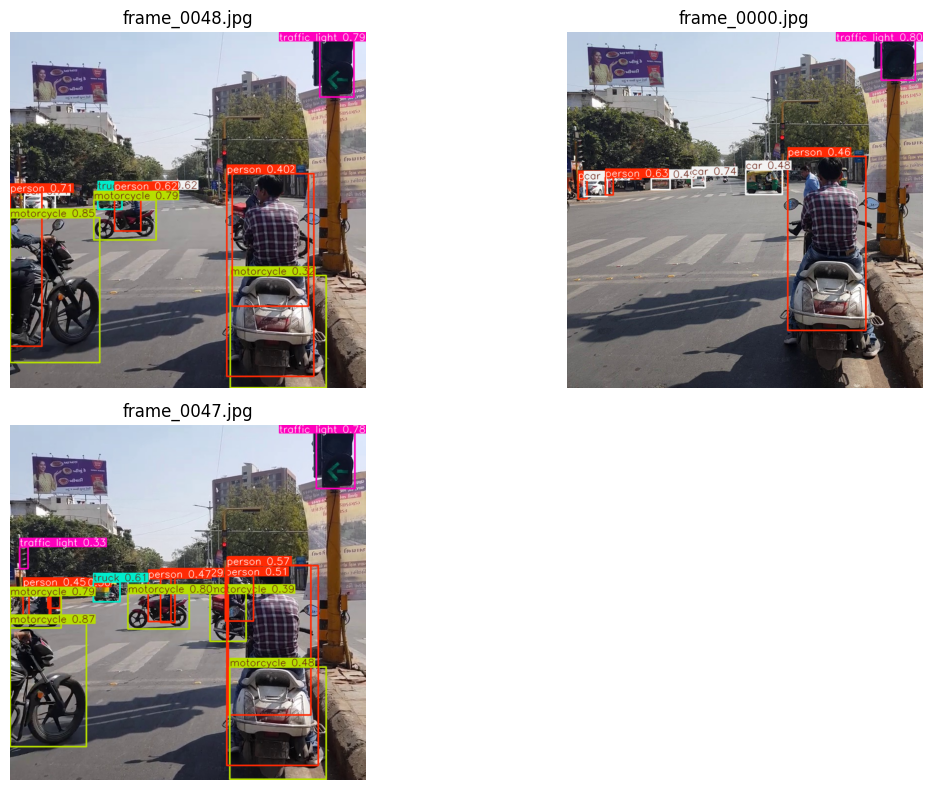

In [ ]:
# Phase 3: Load YOLOv8 model and perform object detection on sample frames

# This cell loads a pretrained YOLO model, runs detection on a few frames,
# and visualizes bounding boxes to verify detection quality.

from ultralytics import YOLO
import os
import random
import cv2
import matplotlib.pyplot as plt

# Paths
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

# Load pretrained YOLOv8 model (general object detection)
model = YOLO("yolov8n.pt")

# Select a few frames for testing detection
frame_files = sorted(os.listdir(FRAMES_DIR))
sample_frames = random.sample(frame_files, min(3, len(frame_files)))

print("Frames selected for YOLO detection:")
for f in sample_frames:
    print(f)

# Run detection and visualize results
plt.figure(figsize=(12, 8))

for i, frame_name in enumerate(sample_frames):
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform YOLO inference
    results = model(frame_rgb)

    # Plot detections on the frame
    annotated_frame = results[0].plot()

    plt.subplot(2, 2, i + 1)
    plt.imshow(annotated_frame)
    plt.title(frame_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Phase 3 Setup (re-run): Install Ultralytics YOLO library after runtime reset

!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.8 MB/s eta 0:00:00


In [ ]:
# runtime reset

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive



0: 640x640 3 persons, 4 cars, 1 traffic light, 8.1ms
Speed: 14.1ms preprocess, 8.1ms inference, 41.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 4 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 4.1ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 5 cars, 2 motorcycles, 1 traffic light, 7.9ms
Speed: 3.0ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 1 car, 1 motorcycle, 1 traffic light, 7.8ms
Speed: 3.7ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 3 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 3.7ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 3 cars, 2 motorcycles, 1 truck, 2 traffic lights, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 p

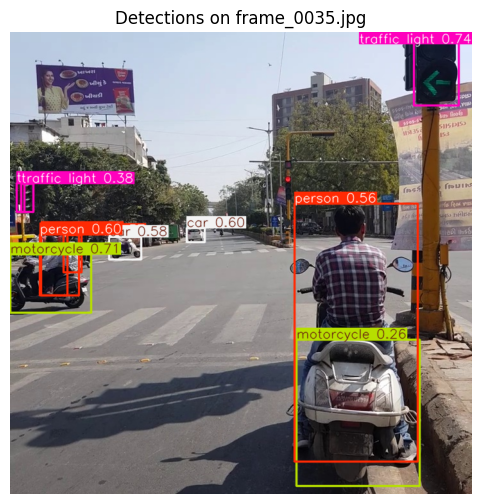

In [ ]:
# Phase 3: Run YOLO on all frames and collect structured detection outputs

# This cell performs object detection on every extracted frame,
# stores bounding box data in memory, and visualizes one sample frame.

from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

# Paths
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

# Load YOLO model
model = YOLO("yolov8n.pt")

# Data structure to store detections
detections = []

frame_files = sorted(os.listdir(FRAMES_DIR))

for frame_name in frame_files:
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model(frame_rgb)

    for box in results[0].boxes:
        detections.append({
            "frame": frame_name,
            "class_id": int(box.cls[0]),
            "class_name": model.names[int(box.cls[0])],
            "confidence": float(box.conf[0]),
            "bbox": box.xyxy[0].tolist()
        })

print("Total frames processed:", len(frame_files))
print("Total detections found:", len(detections))

# Visualize detections on one sample frame
sample_frame = frame_files[len(frame_files) // 2]
sample_path = os.path.join(FRAMES_DIR, sample_frame)
sample_img = cv2.imread(sample_path)
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

sample_results = model(sample_img_rgb)
annotated_sample = sample_results[0].plot()

plt.figure(figsize=(6, 6))
plt.imshow(annotated_sample)
plt.title(f"Detections on {sample_frame}")
plt.axis("off")
plt.show()


In [ ]:
# Phase 3 Final: Filter YOLO detections and prepare clean data for tracking

# This cell filters only traffic-relevant objects from YOLO detections
# and prepares a clean detection list for the tracking phase.

from ultralytics import YOLO
import os
import cv2

# Paths
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

# Load YOLO model
model = YOLO("yolov8n.pt")

# Classes required for tracking and violation logic
VALID_CLASSES = {"person", "motorcycle", "car", "truck", "bus", "traffic light"}

filtered_detections = []

frame_files = sorted(os.listdir(FRAMES_DIR))

for frame_name in frame_files:
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = model(frame_rgb)

    for box in results[0].boxes:
        class_id = int(box.cls[0])
        class_name = model.names[class_id]

        if class_name in VALID_CLASSES:
            filtered_detections.append({
                "frame": frame_name,
                "class": class_name,
                "confidence": float(box.conf[0]),
                "bbox": box.xyxy[0].tolist()
            })

print("Phase 3 Summary:")
print("Total frames processed:", len(frame_files))
print("Total filtered detections:", len(filtered_detections))
print("Sample filtered detection:", filtered_detections[0])



0: 640x640 3 persons, 4 cars, 1 traffic light, 7.9ms
Speed: 2.9ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 4 cars, 2 motorcycles, 1 traffic light, 7.9ms
Speed: 3.2ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 5 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 1 car, 1 motorcycle, 1 traffic light, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 3 cars, 2 motorcycles, 1 traffic light, 10.4ms
Speed: 3.4ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 3 cars, 2 motorcycles, 1 truck, 2 traffic lights, 17.3ms
Speed: 8.5ms preprocess, 17.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5

In [ ]:
# This cell creates a README file explaining why the YOLO models folder is intentionally empty

import os

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
YOLO_MODELS_DIR = os.path.join(PROJECT_ROOT, "models/yolo")

readme_content = """
YOLO MODEL DIRECTORY (INTENTIONAL DESIGN)

This folder is currently empty.

In this project, YOLOv8 is used as a pretrained object detection model
for inference purposes only. The YOLOv8 pretrained weights (yolov8n.pt)
are automatically downloaded and managed internally by the Ultralytics
library during runtime.

Since the model is not fine-tuned or trained within this project,
the pretrained weights are not manually stored here to avoid
unnecessary duplication and to keep the project structure clean.

This directory is reserved for future use, such as:
- Fine-tuned YOLO models
- Custom-trained detection weights
- Versioned models for deployment
"""

readme_path = os.path.join(YOLO_MODELS_DIR, "README.txt")

with open(readme_path, "w") as f:
    f.write(readme_content.strip())

print("README.txt created successfully in models/yolo/")


README.txt created successfully in models/yolo/


In [ ]:
# Phase 4 Cell 1: Install and prepare SORT tracker dependencies

# This cell sets up the tracking environment required for vehicle tracking
# using the SORT algorithm.

!pip install filterpy lap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:00
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=b92428da7075b4a80fca7f161c5af8dc5cd40ec7fe21464c801a9978b96cd507
  Stored in directory: /root/.cache/pip/wheels/77/bf/4c/b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy



0: 640x640 3 persons, 4 cars, 1 traffic light, 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 4 cars, 2 motorcycles, 1 traffic light, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 5 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 1 car, 1 motorcycle, 1 traffic light, 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 3 cars, 2 motorcycles, 1 traffic light, 45.1ms
Speed: 11.8ms preprocess, 45.1ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 3 cars, 2 motorcycles, 1 truck, 2 traffic lights, 12.7ms
Speed: 8.2ms preprocess, 12.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 

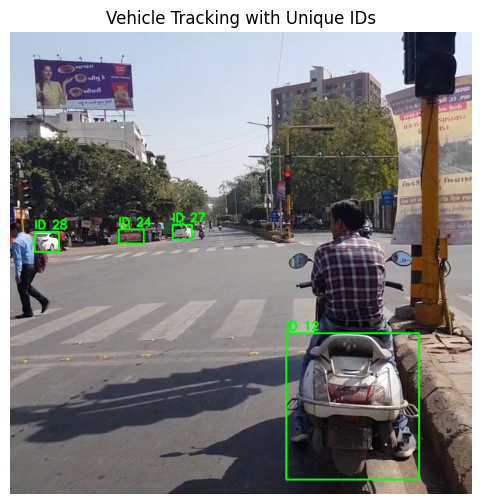

Phase 4 Tracking Summary:
Total frames tracked: 20
Active tracked vehicles: 4
Sample tracked record: ('frame_0000.jpg', 0, [252.76785278320312, 290.0827941894531, 279.9325866699219, 314.7810363769531])


In [ ]:
# Phase 4 Cell 2: Simple vehicle tracking using IOU-based SORT logic

# This cell assigns unique tracking IDs to vehicles across frames
# using bounding box overlap (IOU) and visualizes tracking results.

import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Paths
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

# Load YOLO model
model = YOLO("yolov8n.pt")

# Vehicle classes to track
VEHICLE_CLASSES = {"motorcycle", "car", "truck", "bus"}

# IOU calculation
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    return interArea / float(boxAArea + boxBArea - interArea + 1e-6)

# Tracking state
next_track_id = 0
active_tracks = {}

tracked_results = []

frame_files = sorted(os.listdir(FRAMES_DIR))[:20]  # limit frames for clarity

for frame_name in frame_files:
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    detections = []
    results = model(rgb)

    for box in results[0].boxes:
        cls = model.names[int(box.cls[0])]
        if cls in VEHICLE_CLASSES:
            detections.append(box.xyxy[0].tolist())

    updated_tracks = {}

    for det in detections:
        matched = False
        for track_id, prev_box in active_tracks.items():
            if compute_iou(det, prev_box) > 0.3:
                updated_tracks[track_id] = det
                tracked_results.append((frame_name, track_id, det))
                matched = True
                break

        if not matched:
            updated_tracks[next_track_id] = det
            tracked_results.append((frame_name, next_track_id, det))
            next_track_id += 1

    active_tracks = updated_tracks

# Visualization on last frame
for track_id, box in active_tracks.items():
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"ID {track_id}", (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Vehicle Tracking with Unique IDs")
plt.axis("off")
plt.show()

print("Phase 4 Tracking Summary:")
print("Total frames tracked:", len(frame_files))
print("Active tracked vehicles:", len(active_tracks))
print("Sample tracked record:", tracked_results[0])



0: 640x640 3 persons, 4 cars, 1 traffic light, 9.3ms
Speed: 3.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 4 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 5 cars, 2 motorcycles, 1 traffic light, 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 1 car, 1 motorcycle, 1 traffic light, 9.5ms
Speed: 9.1ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 3 cars, 2 motorcycles, 1 traffic light, 12.0ms
Speed: 9.0ms preprocess, 12.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 3 cars, 2 motorcycles, 1 truck, 2 traffic lights, 10.5ms
Speed: 6.5ms preprocess, 10.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5

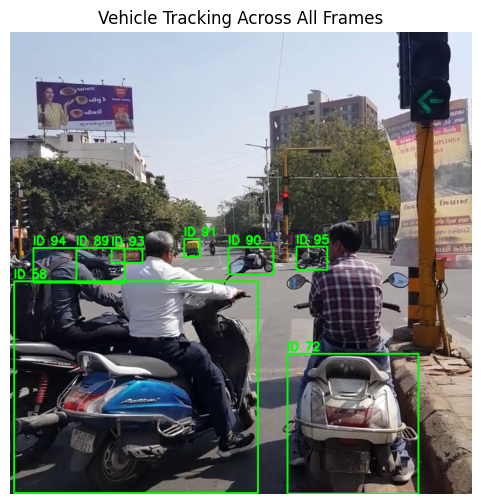

Phase 4 Final Tracking Summary:
Total frames tracked: 70
Total unique vehicle IDs: 96
Sample tracked entry: {'frame': 'frame_0000.jpg', 'track_id': 0, 'bbox': [252.76785278320312, 290.0827941894531, 279.9325866699219, 314.7810363769531]}


In [ ]:
# Phase 4 Cell 3: Track vehicles across all frames and prepare final tracking output

# This cell performs vehicle tracking on all processed frames,
# assigns stable track IDs, and prepares structured tracking data.

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Paths
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")

# Load YOLO model
model = YOLO("yolov8n.pt")

# Vehicle classes to track
VEHICLE_CLASSES = {"motorcycle", "car", "truck", "bus"}

# IOU calculation function
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    return interArea / float(boxAArea + boxBArea - interArea + 1e-6)

# Tracking state
next_track_id = 0
active_tracks = {}
tracked_data = []

frame_files = sorted(os.listdir(FRAMES_DIR))

for frame_name in frame_files:
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    detections = []
    results = model(rgb)

    for box in results[0].boxes:
        cls = model.names[int(box.cls[0])]
        if cls in VEHICLE_CLASSES:
            detections.append(box.xyxy[0].tolist())

    updated_tracks = {}

    for det in detections:
        matched = False
        for track_id, prev_box in active_tracks.items():
            if compute_iou(det, prev_box) > 0.3:
                updated_tracks[track_id] = det
                tracked_data.append({
                    "frame": frame_name,
                    "track_id": track_id,
                    "bbox": det
                })
                matched = True
                break

        if not matched:
            updated_tracks[next_track_id] = det
            tracked_data.append({
                "frame": frame_name,
                "track_id": next_track_id,
                "bbox": det
            })
            next_track_id += 1

    active_tracks = updated_tracks

# Visualization on last frame
for track_id, box in active_tracks.items():
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"ID {track_id}", (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Vehicle Tracking Across All Frames")
plt.axis("off")
plt.show()

print("Phase 4 Final Tracking Summary:")
print("Total frames tracked:", len(frame_files))
print("Total unique vehicle IDs:", len(set(d['track_id'] for d in tracked_data)))
print("Sample tracked entry:", tracked_data[0])


In [ ]:
# Recompute vehicle tracking and persist results for Phase 5 consumption

import os
import cv2
import pandas as pd
from ultralytics import YOLO

# Paths
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")
OUTPUT_DIR = os.path.join(PROJECT_ROOT, "outputs/tracking")
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Load YOLO model
model = YOLO("yolov8n.pt")

# Vehicle classes
VEHICLE_CLASSES = {"motorcycle", "car", "truck", "bus"}

# IOU function
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    return interArea / float(boxAArea + boxBArea - interArea + 1e-6)

# Tracking state
next_track_id = 0
active_tracks = {}
tracking_rows = []

frame_files = sorted(os.listdir(FRAMES_DIR))

for frame_name in frame_files:
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    detections = []
    results = model(rgb)

    for box in results[0].boxes:
        cls = model.names[int(box.cls[0])]
        if cls in VEHICLE_CLASSES:
            detections.append((cls, box.xyxy[0].tolist()))

    updated_tracks = {}

    for cls, det in detections:
        matched = False
        for track_id, prev_box in active_tracks.items():
            if compute_iou(det, prev_box) > 0.3:
                updated_tracks[track_id] = det
                tracking_rows.append([frame_name, track_id, cls, *det])
                matched = True
                break

        if not matched:
            updated_tracks[next_track_id] = det
            tracking_rows.append([frame_name, next_track_id, cls, *det])
            next_track_id += 1

    active_tracks = updated_tracks

# Save tracking summary
tracking_df = pd.DataFrame(
    tracking_rows,
    columns=["frame", "track_id", "class", "x1", "y1", "x2", "y2"]
)

output_path = os.path.join(OUTPUT_DIR, "tracking_summary.csv")
tracking_df.to_csv(output_path, index=False)

print("Option A complete: Tracking summary saved")
print("File path:", output_path)
print("Total tracking records:", len(tracking_df))
tracking_df.head()



0: 640x640 3 persons, 4 cars, 1 traffic light, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 4 cars, 2 motorcycles, 1 traffic light, 7.9ms
Speed: 4.0ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 5 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 3.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 1 car, 1 motorcycle, 1 traffic light, 8.1ms
Speed: 3.5ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 persons, 3 cars, 2 motorcycles, 1 traffic light, 7.8ms
Speed: 3.4ms preprocess, 7.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 persons, 3 cars, 2 motorcycles, 1 truck, 2 traffic lights, 8.0ms
Speed: 3.7ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 per

frame  track_id class          x1          y1          x2  \
0  frame_0000.jpg         0   car  252.767853  290.082794  279.932587   
1  frame_0000.jpg         1   car  170.418060  296.645813  208.255188   
2  frame_0000.jpg         2   car  361.683105  278.180908  435.129028   
3  frame_0000.jpg         3   car   34.174019  299.180847   81.530075   
4  frame_0001.jpg         0   car  252.730453  291.909149  279.649506   

           y2  
0  314.781036  
1  318.656921  
2  328.903961  
3  332.618011  
4  316.644592

In [ ]:
# Mount Google Drive (required after runtime restart)

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Phase 4 freeze cell: validate and load all artifacts required to start Phase 5

import os
import pandas as pd

PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"

# Required artifacts from Phase 0–4
required_paths = {
    "Problem Statement": "project_docs/problem_statement.md",
    "Violation Rules": "project_docs/violation_rules.md",
    "Project Workflow": "project_docs/project_workflow.md",
    "Raw Video": "data/raw_videos/traffic_video_01.mp4",
    "Processed Frames": "data/processed_frames/traffic_video_01",
    "Tracking Summary": "outputs/tracking/tracking_summary.csv"
}

missing = []
for name, rel_path in required_paths.items():
    full_path = os.path.join(PROJECT_ROOT, rel_path)
    if not os.path.exists(full_path):
        missing.append(name)

if missing:
    raise FileNotFoundError(f"Missing required project artifacts: {missing}")

# Load tracking summary (this is Phase 5 input)
tracking_df = pd.read_csv(
    os.path.join(PROJECT_ROOT, "outputs/tracking/tracking_summary.csv")
)

# Basic validation
required_columns = {"frame", "track_id", "class", "x1", "y1", "x2", "y2"}
if not required_columns.issubset(set(tracking_df.columns)):
    raise ValueError("Tracking summary schema is invalid")

print("Phase 4 freeze successful")
print("All required artifacts verified")
print("Tracking records loaded:", len(tracking_df))
tracking_df.head()


Phase 4 freeze successful
All required artifacts verified
Tracking records loaded: 352


frame  track_id class          x1          y1          x2  \
0  frame_0000.jpg         0   car  252.767853  290.082794  279.932587   
1  frame_0000.jpg         1   car  170.418060  296.645813  208.255188   
2  frame_0000.jpg         2   car  361.683105  278.180908  435.129028   
3  frame_0000.jpg         3   car   34.174019  299.180847   81.530075   
4  frame_0001.jpg         0   car  252.730453  291.909149  279.649506   

           y2  
0  314.781036  
1  318.656921  
2  328.903961  
3  332.618011  
4  316.644592

In [ ]:
# Install YOLOv8 (Ultralytics) after runtime reset

!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.0 MB/s eta 0:00:00


In [ ]:
# PHASE 5 - CELL 2
# Purpose: Detect signal jump violations using static traffic light detection (Option A)

import os
import cv2
import pandas as pd
from ultralytics import YOLO

# -----------------------------
# 1. Paths
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
TRACKING_CSV = f"{PROJECT_ROOT}/outputs/tracking/tracking_summary.csv"
FRAMES_DIR = f"{PROJECT_ROOT}/data/processed_frames/traffic_video_01"
OUTPUT_DIR = f"{PROJECT_ROOT}/outputs/violations"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# 2. Load tracking data
# -----------------------------
tracking_df = pd.read_csv(TRACKING_CSV)
vehicles_df = tracking_df[tracking_df["class"].isin(["car", "motorcycle", "truck", "bus"])]

print("Tracking data loaded")
print("Total vehicle records:", len(vehicles_df))

# -----------------------------
# 3. Load YOLO model (for traffic light detection only)
# -----------------------------
model = YOLO("yolov8n.pt")

# -----------------------------
# 4. Define STOP LINE (tuned later if needed)
# -----------------------------
STOP_LINE_Y = 300

# -----------------------------
# 5. Detect frames with RED signal (assumed RED if traffic light detected)
# -----------------------------
red_signal_frames = set()

for frame_name in sorted(os.listdir(FRAMES_DIR)):
    frame_path = os.path.join(FRAMES_DIR, frame_name)
    frame = cv2.imread(frame_path)

    results = model(frame, verbose=False)

    for box in results[0].boxes:
        cls_name = model.names[int(box.cls[0])]
        if cls_name == "traffic light":
            red_signal_frames.add(frame_name)
            break

print("Frames with traffic light detected (assumed RED):", len(red_signal_frames))

# -----------------------------
# 6. Signal jump violation logic
# -----------------------------
violations = []

for track_id, track_data in vehicles_df.groupby("track_id"):
    track_data = track_data.sort_values("frame")

    crossed = False

    for _, row in track_data.iterrows():
        frame = row["frame"]
        y_center = (row["y1"] + row["y2"]) / 2

        if frame in red_signal_frames and y_center > STOP_LINE_Y:
            violations.append({
                "frame": frame,
                "track_id": track_id,
                "vehicle_type": row["class"],
                "violation_type": "Signal Jump",
                "y_position": y_center
            })
            crossed = True
            break

# -----------------------------
# 7. Save violations
# -----------------------------
violations_df = pd.DataFrame(violations)
output_file = f"{OUTPUT_DIR}/signal_jump_violations.csv"
violations_df.to_csv(output_file, index=False)

# -----------------------------
# 8. Summary
# -----------------------------
print("\nSignal Jump Detection (Option A) Complete")
print("Total signal jump violations detected:", len(violations_df))
print("Saved to:", output_file)

violations_df.head()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Tracking data loaded
Total vehicle records: 352
Frames with traffic light detected (assumed RED): 70

Signal Jump Detection (Option A) Complete
Total signal jump violations detected: 94
Saved to: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/signal_jump_violations.csv


frame  track_id vehicle_type violation_type  y_position
0  frame_0000.jpg         0          car    Signal Jump  302.431915
1  frame_0000.jpg         1          car    Signal Jump  307.651367
2  frame_0000.jpg         2          car    Signal Jump  303.542435
3  frame_0000.jpg         3          car    Signal Jump  315.899429
4  frame_0001.jpg         4   motorcycle    Signal Jump  336.935333

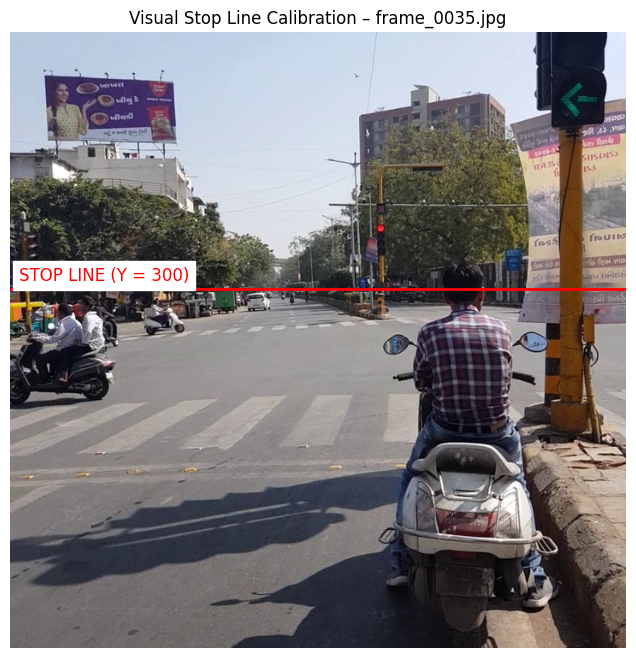

In [ ]:
# PHASE 5 - CELL 3
# Purpose: Visually tune stop line position using a sample frame

import cv2
import matplotlib.pyplot as plt
import os

# -----------------------------
# Paths
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
FRAMES_DIR = f"{PROJECT_ROOT}/data/processed_frames/traffic_video_01"

# Pick a representative frame (middle frame is usually best)
frame_name = sorted(os.listdir(FRAMES_DIR))[len(os.listdir(FRAMES_DIR)) // 2]
frame_path = os.path.join(FRAMES_DIR, frame_name)

# -----------------------------
# Load frame
# -----------------------------
frame = cv2.imread(frame_path)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# -----------------------------
# Current stop line value (from Phase 5 – Cell 2)
# -----------------------------
STOP_LINE_Y = 300

# -----------------------------
# Draw stop line
# -----------------------------
plt.figure(figsize=(8, 8))
plt.imshow(frame_rgb)
plt.axhline(y=STOP_LINE_Y, color="red", linewidth=2)
plt.text(
    10,
    STOP_LINE_Y - 10,
    f"STOP LINE (Y = {STOP_LINE_Y})",
    color="red",
    fontsize=12,
    backgroundcolor="white"
)
plt.title(f"Visual Stop Line Calibration – {frame_name}")
plt.axis("off")
plt.show()


In [ ]:
# PHASE 5 - CELL 4
# Purpose: Apply tuned stop line and re-run signal jump detection

import os
import cv2
import pandas as pd
from ultralytics import YOLO

# -----------------------------
# Paths
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
TRACKING_CSV = f"{PROJECT_ROOT}/outputs/tracking/tracking_summary.csv"
FRAMES_DIR = f"{PROJECT_ROOT}/data/processed_frames/traffic_video_01"
OUTPUT_DIR = f"{PROJECT_ROOT}/outputs/violations"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# Load tracking data
# -----------------------------
tracking_df = pd.read_csv(TRACKING_CSV)
vehicles_df = tracking_df[tracking_df["class"].isin(["car", "motorcycle", "truck", "bus"])]

# -----------------------------
# Load YOLO model
# -----------------------------
model = YOLO("yolov8n.pt")

# -----------------------------
# Tuned STOP LINE
# -----------------------------
STOP_LINE_Y = 280

# -----------------------------
# Detect frames with traffic light (assumed RED)
# -----------------------------
red_signal_frames = set()

for frame_name in sorted(os.listdir(FRAMES_DIR)):
    frame = cv2.imread(os.path.join(FRAMES_DIR, frame_name))
    results = model(frame, verbose=False)

    for box in results[0].boxes:
        if model.names[int(box.cls[0])] == "traffic light":
            red_signal_frames.add(frame_name)
            break

# -----------------------------
# Signal jump detection
# -----------------------------
violations = []

for track_id, track_data in vehicles_df.groupby("track_id"):
    track_data = track_data.sort_values("frame")

    for _, row in track_data.iterrows():
        frame = row["frame"]
        y_center = (row["y1"] + row["y2"]) / 2

        if frame in red_signal_frames and y_center > STOP_LINE_Y:
            violations.append({
                "frame": frame,
                "track_id": track_id,
                "vehicle_type": row["class"],
                "violation_type": "Signal Jump",
                "y_position": y_center
            })
            break

# -----------------------------
# Save updated violations
# -----------------------------
violations_df = pd.DataFrame(violations)
output_file = f"{OUTPUT_DIR}/signal_jump_violations_tuned.csv"
violations_df.to_csv(output_file, index=False)

# -----------------------------
# Summary
# -----------------------------
print("Signal Jump Detection after Stop Line Tuning")
print("STOP_LINE_Y =", STOP_LINE_Y)
print("Total signal jump violations detected:", len(violations_df))
print("Saved to:", output_file)

violations_df.head()


Signal Jump Detection after Stop Line Tuning
STOP_LINE_Y = 280
Total signal jump violations detected: 96
Saved to: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/signal_jump_violations_tuned.csv


frame  track_id vehicle_type violation_type  y_position
0  frame_0000.jpg         0          car    Signal Jump  302.431915
1  frame_0000.jpg         1          car    Signal Jump  307.651367
2  frame_0000.jpg         2          car    Signal Jump  303.542435
3  frame_0000.jpg         3          car    Signal Jump  315.899429
4  frame_0001.jpg         4   motorcycle    Signal Jump  336.935333

In [ ]:
# PHASE 5 - CELL 5
# Purpose: Detect true signal jump violations using line-crossing logic

import os
import cv2
import pandas as pd
from ultralytics import YOLO

# -----------------------------
# Paths
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
TRACKING_CSV = f"{PROJECT_ROOT}/outputs/tracking/tracking_summary.csv"
FRAMES_DIR = f"{PROJECT_ROOT}/data/processed_frames/traffic_video_01"
OUTPUT_DIR = f"{PROJECT_ROOT}/outputs/violations"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# -----------------------------
# Load tracking data
# -----------------------------
tracking_df = pd.read_csv(TRACKING_CSV)
vehicles_df = tracking_df[tracking_df["class"].isin(["car", "motorcycle", "truck", "bus"])]

# -----------------------------
# Load YOLO model (traffic light detection)
# -----------------------------
model = YOLO("yolov8n.pt")

# -----------------------------
# Final STOP LINE (kept realistic)
# -----------------------------
STOP_LINE_Y = 300

# -----------------------------
# Detect frames with traffic light (assumed RED)
# -----------------------------
red_signal_frames = set()

for frame_name in sorted(os.listdir(FRAMES_DIR)):
    frame = cv2.imread(os.path.join(FRAMES_DIR, frame_name))
    results = model(frame, verbose=False)

    for box in results[0].boxes:
        if model.names[int(box.cls[0])] == "traffic light":
            red_signal_frames.add(frame_name)
            break

# -----------------------------
# Signal jump detection using line-crossing
# -----------------------------
violations = []

for track_id, track_data in vehicles_df.groupby("track_id"):
    track_data = track_data.sort_values("frame")

    prev_y = None

    for _, row in track_data.iterrows():
        frame = row["frame"]
        y_center = (row["y1"] + row["y2"]) / 2

        if prev_y is not None:
            crossed_line = prev_y <= STOP_LINE_Y and y_center > STOP_LINE_Y
            red_signal = frame in red_signal_frames

            if crossed_line and red_signal:
                violations.append({
                    "frame": frame,
                    "track_id": track_id,
                    "vehicle_type": row["class"],
                    "violation_type": "Signal Jump",
                    "prev_y": prev_y,
                    "current_y": y_center
                })
                break  # one violation per vehicle

        prev_y = y_center

# -----------------------------
# Save violations
# -----------------------------
violations_df = pd.DataFrame(violations)
output_file = f"{OUTPUT_DIR}/signal_jump_violations_final.csv"
violations_df.to_csv(output_file, index=False)

# -----------------------------
# Summary
# -----------------------------
print("Signal Jump Detection using Line-Crossing Logic")
print("STOP_LINE_Y =", STOP_LINE_Y)
print("Total signal jump violations detected:", len(violations_df))
print("Saved to:", output_file)

violations_df.head()


Signal Jump Detection using Line-Crossing Logic
STOP_LINE_Y = 300
Total signal jump violations detected: 0
Saved to: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/signal_jump_violations_final.csv


Empty DataFrame
Columns: []
Index: []

In [ ]:
# PHASE 5 – CELL 6
# Purpose: Compute relative speed of each tracked vehicle using frame-to-frame movement

# -----------------------------
# Reconnect Google Drive (runtime reset safe)
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

# -----------------------------
# Imports
# -----------------------------
import pandas as pd
import numpy as np

# -----------------------------
# Paths
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
TRACKING_CSV = f"{PROJECT_ROOT}/outputs/tracking/tracking_summary.csv"
OUTPUT_DIR = f"{PROJECT_ROOT}/outputs/violations"

# -----------------------------
# Load tracking data
# -----------------------------
tracking_df = pd.read_csv(TRACKING_CSV)

# Keep only vehicles (exclude persons, backpacks, etc.)
vehicle_df = tracking_df[
    tracking_df["class"].isin(["car", "motorcycle", "truck", "bus"])
].copy()

# -----------------------------
# Video metadata (from Phase 1)
# -----------------------------
FPS = 30  # frames per second
TIME_PER_FRAME = 1 / FPS

# -----------------------------
# Compute center point of each bounding box
# -----------------------------
vehicle_df["cx"] = (vehicle_df["x1"] + vehicle_df["x2"]) / 2
vehicle_df["cy"] = (vehicle_df["y1"] + vehicle_df["y2"]) / 2

# -----------------------------
# Compute speed per vehicle per frame
# -----------------------------
speed_records = []

for track_id, track_data in vehicle_df.groupby("track_id"):
    track_data = track_data.sort_values("frame")

    prev_x, prev_y = None, None

    for _, row in track_data.iterrows():
        if prev_x is not None:
            # Euclidean distance between consecutive frames
            distance = np.sqrt((row["cx"] - prev_x)**2 + (row["cy"] - prev_y)**2)

            # Relative speed (pixels per second)
            speed = distance / TIME_PER_FRAME

            speed_records.append({
                "frame": row["frame"],
                "track_id": track_id,
                "vehicle_type": row["class"],
                "speed_px_per_sec": speed
            })

        prev_x, prev_y = row["cx"], row["cy"]

# -----------------------------
# Create speed DataFrame
# -----------------------------
speed_df = pd.DataFrame(speed_records)

# -----------------------------
# Save speed data for next cells
# -----------------------------
speed_output_path = f"{OUTPUT_DIR}/vehicle_speeds.csv"
speed_df.to_csv(speed_output_path, index=False)

# -----------------------------
# Summary
# -----------------------------
print("Over-Speeding – Speed Computation Complete")
print("Total speed records:", len(speed_df))
print("Saved to:", speed_output_path)

speed_df.head()


Mounted at /content/drive
Over-Speeding – Speed Computation Complete
Total speed records: 256
Saved to: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/vehicle_speeds.csv


frame  track_id vehicle_type  speed_px_per_sec
0  frame_0001.jpg         0          car         55.557032
1  frame_0002.jpg         0          car         58.965968
2  frame_0003.jpg         0          car         69.285064
3  frame_0004.jpg         0          car         71.730493
4  frame_0005.jpg         0          car         34.936628

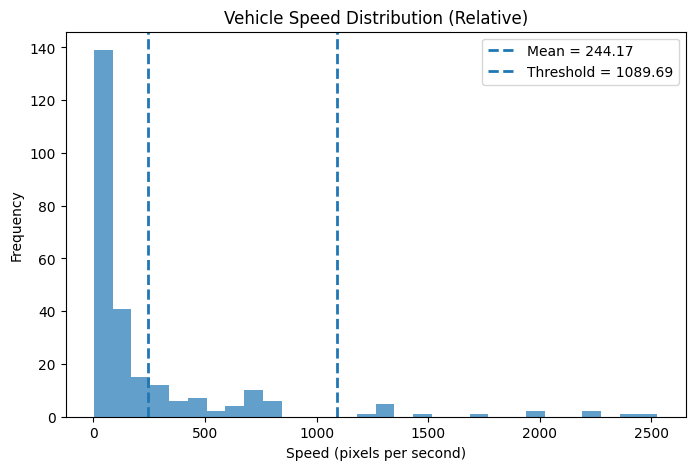

Over-Speeding Threshold Selection Complete
Mean speed: 244.17 px/sec
Standard deviation: 422.76 px/sec
Selected speed threshold: 1089.69 px/sec


In [ ]:
# PHASE 5 – CELL 7
# Purpose: Analyze speed distribution and decide over-speeding threshold

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Paths
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"
SPEED_CSV = f"{PROJECT_ROOT}/outputs/violations/vehicle_speeds.csv"

# -----------------------------
# Load speed data
# -----------------------------
speed_df = pd.read_csv(SPEED_CSV)

# -----------------------------
# Basic statistics
# -----------------------------
mean_speed = speed_df["speed_px_per_sec"].mean()
std_speed = speed_df["speed_px_per_sec"].std()

# Data-driven threshold (mean + 2 * std)
SPEED_THRESHOLD = mean_speed + 2 * std_speed

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8, 5))
plt.hist(speed_df["speed_px_per_sec"], bins=30, alpha=0.7)
plt.axvline(mean_speed, linestyle="--", linewidth=2, label=f"Mean = {mean_speed:.2f}")
plt.axvline(SPEED_THRESHOLD, linestyle="--", linewidth=2, label=f"Threshold = {SPEED_THRESHOLD:.2f}")
plt.xlabel("Speed (pixels per second)")
plt.ylabel("Frequency")
plt.title("Vehicle Speed Distribution (Relative)")
plt.legend()
plt.show()

# -----------------------------
# Summary
# -----------------------------
print("Over-Speeding Threshold Selection Complete")
print(f"Mean speed: {mean_speed:.2f} px/sec")
print(f"Standard deviation: {std_speed:.2f} px/sec")
print(f"Selected speed threshold: {SPEED_THRESHOLD:.2f} px/sec")


Mounted at /content/drive


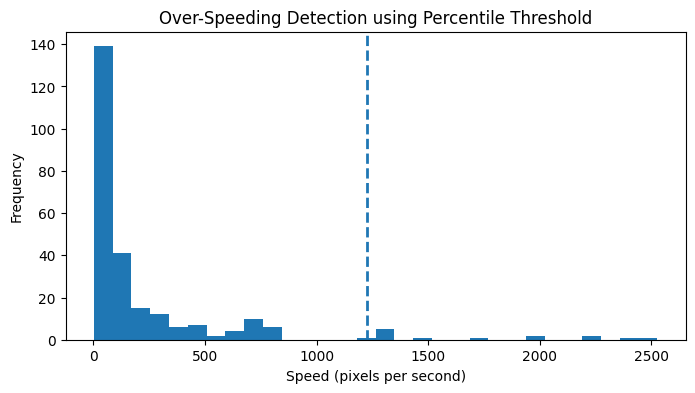

Over-Speeding Detection Complete (Percentile-Based)
Percentile used: 95th
Speed threshold: 1228.00 px/sec
Total over-speeding violations detected: 13
Saved to: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/over_speeding_violations.csv


frame  track_id vehicle_type  speed_px_per_sec violation_type
127  frame_0038.jpg        45   motorcycle       1275.045542  Over-Speeding
128  frame_0039.jpg        45   motorcycle       1293.098439  Over-Speeding
129  frame_0040.jpg        45   motorcycle       1433.543084  Over-Speeding
130  frame_0041.jpg        45   motorcycle       1326.765247  Over-Speeding
131  frame_0042.jpg        45   motorcycle       1279.166389  Over-Speeding

In [ ]:
# PHASE 5 – CELL 8
# Purpose: Detect over-speeding vehicles using percentile-based thresholding (robust & realistic)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Drive (safe if already mounted)
drive.mount('/content/drive')

# Paths
SPEED_FILE = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/vehicle_speeds.csv"
OUTPUT_FILE = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/over_speeding_violations.csv"

# Load speed data
speed_df = pd.read_csv(SPEED_FILE)

# Use 95th percentile for over-speeding detection
PERCENTILE = 95
speed_threshold = np.percentile(speed_df["speed_px_per_sec"], PERCENTILE)

# Flag over-speeding vehicles
overspeed_df = speed_df[speed_df["speed_px_per_sec"] >= speed_threshold].copy()
overspeed_df["violation_type"] = "Over-Speeding"

# Save results
overspeed_df.to_csv(OUTPUT_FILE, index=False)

# Visualization: Speed distribution with threshold
plt.figure(figsize=(8, 4))
plt.hist(speed_df["speed_px_per_sec"], bins=30)
plt.axvline(speed_threshold, linestyle="--", linewidth=2)
plt.title("Over-Speeding Detection using Percentile Threshold")
plt.xlabel("Speed (pixels per second)")
plt.ylabel("Frequency")
plt.show()

# Summary output
print("Over-Speeding Detection Complete (Percentile-Based)")
print(f"Percentile used: {PERCENTILE}th")
print(f"Speed threshold: {speed_threshold:.2f} px/sec")
print(f"Total over-speeding violations detected: {len(overspeed_df)}")
print(f"Saved to: {OUTPUT_FILE}")

overspeed_df.head()


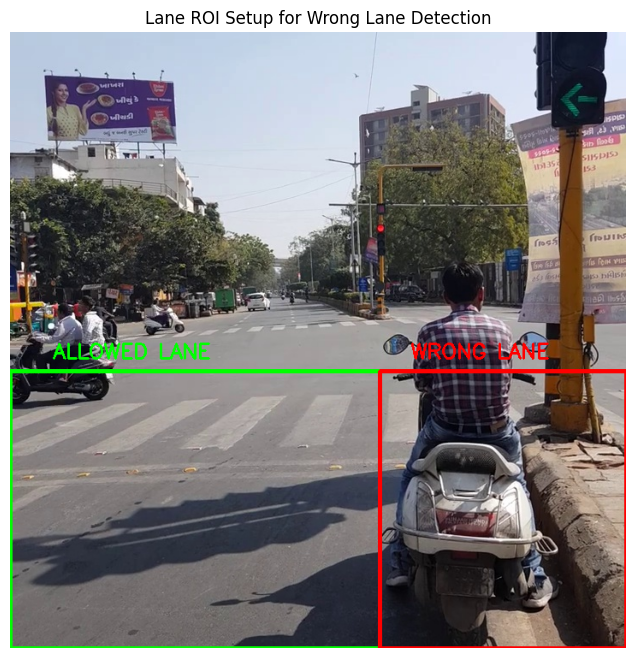

Lane ROI setup completed
Green  → Allowed Lane
Red    → Wrong Lane


In [ ]:
# Phase 5 – Cell 9
# This cell defines lane regions (ROIs) on a sample frame
# These regions will be used later to detect wrong-lane violations

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# -----------------------------
# Paths
# -----------------------------
FRAME_PATH = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/data/processed_frames/traffic_video_01/frame_0035.jpg"

assert os.path.exists(FRAME_PATH), "Sample frame not found"

# -----------------------------
# Load frame
# -----------------------------
image = cv2.imread(FRAME_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w, _ = image.shape

# -----------------------------
# Define Lane ROIs (manually)
# -----------------------------
# NOTE:
# These coordinates are chosen based on visual inspection
# You can fine-tune them later if needed

# Allowed lane (vehicles SHOULD be here)
ALLOWED_LANE = np.array([
    [0, int(h * 0.55)],
    [int(w * 0.6), int(h * 0.55)],
    [int(w * 0.6), h],
    [0, h]
])

# Wrong lane (vehicles SHOULD NOT be here)
WRONG_LANE = np.array([
    [int(w * 0.6), int(h * 0.55)],
    [w, int(h * 0.55)],
    [w, h],
    [int(w * 0.6), h]
])

# -----------------------------
# Visualization
# -----------------------------
overlay = image.copy()

cv2.polylines(overlay, [ALLOWED_LANE], True, (0, 255, 0), 3)
cv2.polylines(overlay, [WRONG_LANE], True, (255, 0, 0), 3)

cv2.putText(overlay, "ALLOWED LANE", (50, int(h * 0.53)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

cv2.putText(overlay, "WRONG LANE", (int(w * 0.65), int(h * 0.53)),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

plt.figure(figsize=(8, 8))
plt.imshow(overlay)
plt.title("Lane ROI Setup for Wrong Lane Detection")
plt.axis("off")
plt.show()

print("Lane ROI setup completed")
print("Green  → Allowed Lane")
print("Red    → Wrong Lane")


In [ ]:
# Phase 5 – Cell 10
# This cell detects WRONG LANE violations using ROI-based spatial logic on tracked vehicles

from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# -----------------------------
# Paths
# -----------------------------
TRACKING_CSV = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/tracking/tracking_summary.csv"
OUTPUT_DIR = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations"
os.makedirs(OUTPUT_DIR, exist_ok=True)

OUTPUT_CSV = os.path.join(OUTPUT_DIR, "wrong_lane_violations.csv")

# -----------------------------
# Load tracking data
# -----------------------------
df = pd.read_csv(TRACKING_CSV)

# Consider only vehicles (ignore persons, traffic lights, etc.)
vehicle_classes = ["car", "motorcycle", "truck", "bus"]
df = df[df["class"].isin(vehicle_classes)].copy()

# -----------------------------
# Define WRONG LANE ROI (from visual tuning)
# Format: (x_min, y_min, x_max, y_max)
# -----------------------------
WRONG_LANE_ROI = {
    "x_min": 420,
    "y_min": 250,
    "x_max": 720,
    "y_max": 720
}

# -----------------------------
# Compute center point of each vehicle
# -----------------------------
df["center_x"] = (df["x1"] + df["x2"]) / 2
df["center_y"] = (df["y1"] + df["y2"]) / 2

# -----------------------------
# Apply WRONG LANE logic
# -----------------------------
def is_in_wrong_lane(row):
    return (
        WRONG_LANE_ROI["x_min"] <= row["center_x"] <= WRONG_LANE_ROI["x_max"] and
        WRONG_LANE_ROI["y_min"] <= row["center_y"] <= WRONG_LANE_ROI["y_max"]
    )

df["wrong_lane"] = df.apply(is_in_wrong_lane, axis=1)

# -----------------------------
# Extract violations
# -----------------------------
violations = df[df["wrong_lane"]].copy()
violations["violation_type"] = "Wrong Lane"

violations = violations[[
    "frame",
    "track_id",
    "class",
    "violation_type",
    "center_x",
    "center_y"
]]

violations.rename(columns={"class": "vehicle_type"}, inplace=True)

# -----------------------------
# Save results
# -----------------------------
violations.to_csv(OUTPUT_CSV, index=False)

# -----------------------------
# Summary
# -----------------------------
print("Wrong Lane Detection Complete")
print(f"Total wrong lane violations detected: {len(violations)}")
print(f"Saved to: {OUTPUT_CSV}")

violations.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wrong Lane Detection Complete
Total wrong lane violations detected: 75
Saved to: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violations/wrong_lane_violations.csv


frame  track_id vehicle_type violation_type    center_x  \
9   frame_0001.jpg         5   motorcycle     Wrong Lane  538.822784   
15  frame_0002.jpg         7          car     Wrong Lane  471.727463   
16  frame_0002.jpg         5   motorcycle     Wrong Lane  536.062119   
23  frame_0004.jpg        12   motorcycle     Wrong Lane  534.170303   
27  frame_0005.jpg        14        truck     Wrong Lane  469.582611   

      center_y  
9   573.978729  
15  293.140823  
16  576.402863  
23  580.034058  
27  310.378204

In [3]:
# Phase 6 – Cell 1
# Purpose: Setup environment and load all required inputs for evidence generation

from google.colab import drive
import os
import pandas as pd

# -----------------------------
# Mount Google Drive
# -----------------------------
drive.mount('/content/drive')

# -----------------------------
# Base project path
# -----------------------------
PROJECT_ROOT = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection"

# -----------------------------
# Define important paths
# -----------------------------
FRAMES_DIR = os.path.join(PROJECT_ROOT, "data/processed_frames/traffic_video_01")
TRACKING_CSV = os.path.join(PROJECT_ROOT, "outputs/tracking/tracking_summary.csv")

SIGNAL_JUMP_CSV = os.path.join(PROJECT_ROOT, "outputs/violations/signal_jump_violations_final.csv")
OVER_SPEED_CSV = os.path.join(PROJECT_ROOT, "outputs/violations/over_speeding_violations.csv")
WRONG_LANE_CSV = os.path.join(PROJECT_ROOT, "outputs/violations/wrong_lane_violations.csv")

EVIDENCE_DIR = os.path.join(PROJECT_ROOT, "outputs/evidence")

# -----------------------------
# Create evidence folders
# -----------------------------
os.makedirs(os.path.join(EVIDENCE_DIR, "signal_jump"), exist_ok=True)
os.makedirs(os.path.join(EVIDENCE_DIR, "over_speeding"), exist_ok=True)
os.makedirs(os.path.join(EVIDENCE_DIR, "wrong_lane"), exist_ok=True)

# -----------------------------
# Verify required files exist
# -----------------------------
required_paths = {
    "Frames directory": FRAMES_DIR,
    "Tracking CSV": TRACKING_CSV,
    "Signal Jump CSV": SIGNAL_JUMP_CSV,
    "Over-Speeding CSV": OVER_SPEED_CSV,
    "Wrong Lane CSV": WRONG_LANE_CSV
}

missing = [name for name, path in required_paths.items() if not os.path.exists(path)]

if missing:
    raise FileNotFoundError(f"Missing required inputs: {missing}")

# -----------------------------
# Load data
# -----------------------------
from pandas.errors import EmptyDataError

def safe_load_csv(path, columns):
    try:
        return pd.read_csv(path)
    except (EmptyDataError, FileNotFoundError):
        return pd.DataFrame(columns=columns)


tracking_df = pd.read_csv(TRACKING_CSV)

signal_jump_df = safe_load_csv(
    SIGNAL_JUMP_CSV,
    ["frame", "track_id", "vehicle_type", "violation_type"]
)

over_speed_df = safe_load_csv(
    OVER_SPEED_CSV,
    ["frame", "track_id", "vehicle_type", "speed_px_per_sec", "violation_type"]
)

wrong_lane_df = safe_load_csv(
    WRONG_LANE_CSV,
    ["frame", "track_id", "vehicle_type", "violation_type", "center_x", "center_y"]
)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Previewing sample Wrong Lane violations


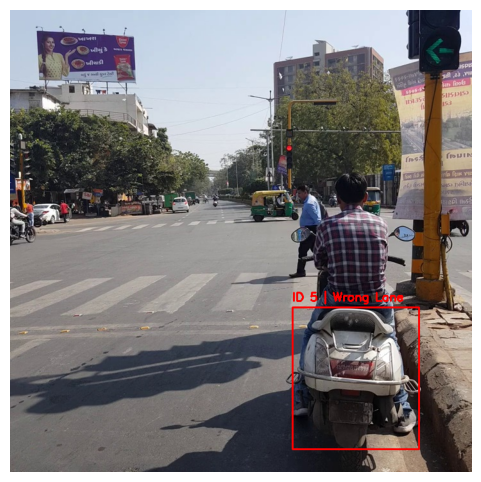

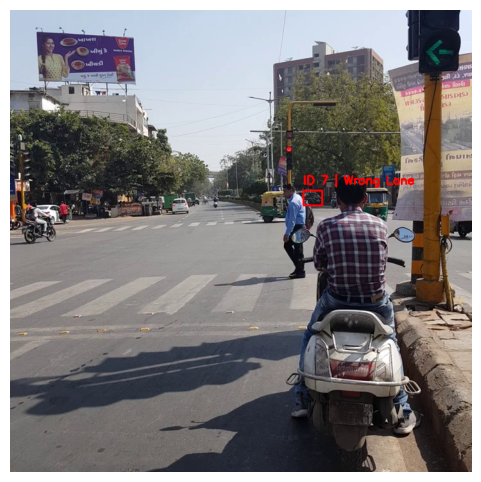

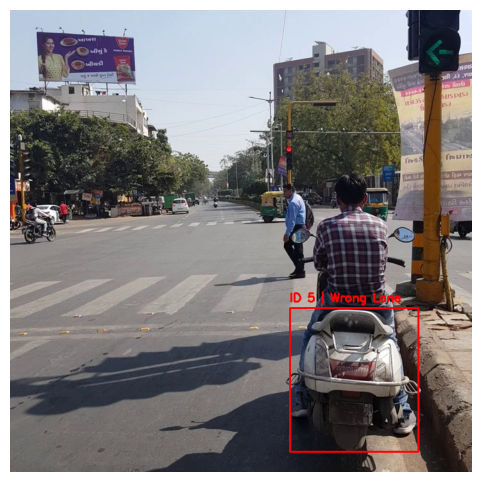

In [4]:
# Phase 6 – Cell 2
# Purpose: Preview evidence images (NO saving, only visualization)

import cv2
import matplotlib.pyplot as plt

# -----------------------------
# Helper function to draw and display
# -----------------------------
def preview_violation(frame_path, bbox, label):
    image = cv2.imread(frame_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    x1, y1, x2, y2 = map(int, bbox)

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(
        image,
        label,
        (x1, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (255, 0, 0),
        2
    )

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# -----------------------------
# Choose ONE violation type to preview
# (start with wrong lane as it has data)
# -----------------------------
sample_df = wrong_lane_df.head(3)

print("Previewing sample Wrong Lane violations")

for _, row in sample_df.iterrows():
    frame_name = row["frame"]
    track_id = row["track_id"]

    frame_path = os.path.join(FRAMES_DIR, frame_name)

    track_row = tracking_df[
        (tracking_df["frame"] == frame_name) &
        (tracking_df["track_id"] == track_id)
    ]

    if track_row.empty:
        continue

    bbox = [
        track_row.iloc[0]["x1"],
        track_row.iloc[0]["y1"],
        track_row.iloc[0]["x2"],
        track_row.iloc[0]["y2"]
    ]

    label = f"ID {track_id} | Wrong Lane"

    preview_violation(frame_path, bbox, label)


In [1]:
# ==============================
# Phase 7 – Cell 1
# Load & Validate Violation Data
# ==============================

import pandas as pd
import os
from google.colab import drive

# ------------------------------
# Mount Google Drive
# ------------------------------
drive.mount("/content/drive")

BASE_PATH = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs"

# File paths
TRACKING_CSV = f"{BASE_PATH}/tracking/tracking_summary.csv"
SIGNAL_JUMP_CSV = f"{BASE_PATH}/violations/signal_jump_violations_final.csv"
OVER_SPEED_CSV = f"{BASE_PATH}/violations/over_speeding_violations.csv"
WRONG_LANE_CSV = f"{BASE_PATH}/violations/wrong_lane_violations.csv"

# ------------------------------
# Safe CSV Loader
# ------------------------------
def safe_load_csv(path, name):
    if not os.path.exists(path):
        print(f"❌ {name} not found")
        return pd.DataFrame()
    try:
        df = pd.read_csv(path)
        if df.empty:
            print(f"⚠️ {name} exists but has NO records")
        else:
            print(f"✅ {name} loaded | Records: {len(df)}")
        return df
    except Exception as e:
        print(f"❌ Failed to load {name}: {e}")
        return pd.DataFrame()

# ------------------------------
# Load data
# ------------------------------
tracking_df = safe_load_csv(TRACKING_CSV, "Tracking Summary")
signal_jump_df = safe_load_csv(SIGNAL_JUMP_CSV, "Signal Jump Violations")
over_speed_df = safe_load_csv(OVER_SPEED_CSV, "Over-Speeding Violations")
wrong_lane_df = safe_load_csv(WRONG_LANE_CSV, "Wrong Lane Violations")

# ------------------------------
# Quick Validation Summary
# ------------------------------
print("\n📊 Phase 7 – Data Readiness Summary")
print("----------------------------------")
print(f"Tracking records     : {len(tracking_df)}")
print(f"Signal jump records  : {len(signal_jump_df)}")
print(f"Over-speed records   : {len(over_speed_df)}")
print(f"Wrong lane records   : {len(wrong_lane_df)}")

total_violations = (
    len(signal_jump_df) +
    len(over_speed_df) +
    len(wrong_lane_df)
)

print("----------------------------------")
print(f"Total violations available for storage: {total_violations}")


Mounted at /content/drive
✅ Tracking Summary loaded | Records: 352
❌ Failed to load Signal Jump Violations: No columns to parse from file
✅ Over-Speeding Violations loaded | Records: 13
✅ Wrong Lane Violations loaded | Records: 75

📊 Phase 7 – Data Readiness Summary
----------------------------------
Tracking records     : 352
Signal jump records  : 0
Over-speed records   : 13
Wrong lane records   : 75
----------------------------------
Total violations available for storage: 88


In [4]:
# ==============================
# Phase 7 – Cell 2
# Create Final Unified Violation Record
# ==============================

import pandas as pd
import os

OUTPUT_DIR = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violation_records"
os.makedirs(OUTPUT_DIR, exist_ok=True)

FINAL_CSV = f"{OUTPUT_DIR}/final_violation_records.csv"

records = []

# ------------------------------
# Add Over-Speeding Violations
# ------------------------------
for _, row in over_speed_df.iterrows():
    records.append({
        "frame": row["frame"],
        "track_id": row["track_id"],
        "vehicle_type": row["vehicle_type"],
        "violation_type": "Over-Speeding",
        "extra_info": f"Speed: {row['speed_px_per_sec']:.2f} px/sec",
        "timestamp": "N/A",
        "location": "Sample Junction"
    })

# ------------------------------
# Add Wrong Lane Violations
# ------------------------------
for _, row in wrong_lane_df.iterrows():
    records.append({
        "frame": row["frame"],
        "track_id": row["track_id"],
        "vehicle_type": row["vehicle_type"],
        "violation_type": "Wrong Lane",
        "extra_info": f"Center: ({row['center_x']:.1f},{row['center_y']:.1f})",
        "timestamp": "N/A",
        "location": "Sample Junction"
    })

# ------------------------------
# Create DataFrame & Save
# ------------------------------
final_df = pd.DataFrame(records)
final_df.to_csv(FINAL_CSV, index=False)

print("✅ Phase 7 – Final Violation Record Created")
print(f"Saved at: {FINAL_CSV}")
print(f"Total records saved: {len(final_df)}")

final_df.sample(5)


✅ Phase 7 – Final Violation Record Created
Saved at: /content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violation_records/final_violation_records.csv
Total records saved: 88


frame  track_id vehicle_type violation_type  \
5   frame_0044.jpg        45   motorcycle  Over-Speeding   
84  frame_0067.jpg        88   motorcycle     Wrong Lane   
69  frame_0056.jpg        72   motorcycle     Wrong Lane   
7   frame_0046.jpg        58   motorcycle  Over-Speeding   
27  frame_0010.jpg        12   motorcycle     Wrong Lane   

               extra_info timestamp         location  
5   Speed: 1336.63 px/sec       N/A  Sample Junction  
84  Center: (427.8,346.9)       N/A  Sample Junction  
69  Center: (533.2,607.1)       N/A  Sample Junction  
7   Speed: 1969.70 px/sec       N/A  Sample Junction  
27  Center: (533.3,586.7)       N/A  Sample Junction

✅ Phase 8 – Violation Data Loaded Successfully
Total violations: 88

Violation Types Count:
violation_type
Wrong Lane       75
Over-Speeding    13
Name: count, dtype: int64


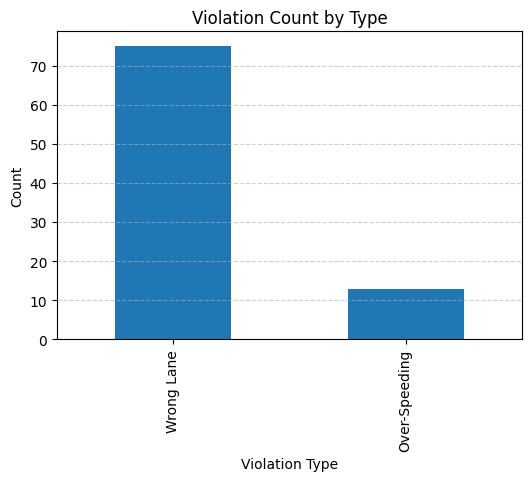

In [5]:
# Phase 8 – Cell 1
# Load final violation records and generate basic summary + visualization

import pandas as pd
import matplotlib.pyplot as plt

# Path to final violation records
FINAL_VIOLATION_CSV = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violation_records/final_violation_records.csv"

# Load data
violations_df = pd.read_csv(FINAL_VIOLATION_CSV)

# Display basic info
print("✅ Phase 8 – Violation Data Loaded Successfully")
print("Total violations:", len(violations_df))
print("\nViolation Types Count:")
print(violations_df["violation_type"].value_counts())

# -----------------------------
# Visualization: Violations by Type
# -----------------------------
plt.figure(figsize=(6,4))
violations_df["violation_type"].value_counts().plot(kind="bar")
plt.title("Violation Count by Type")
plt.xlabel("Violation Type")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Violation Count by Vehicle Type:
vehicle_type
motorcycle    77
car            8
truck          3
Name: count, dtype: int64


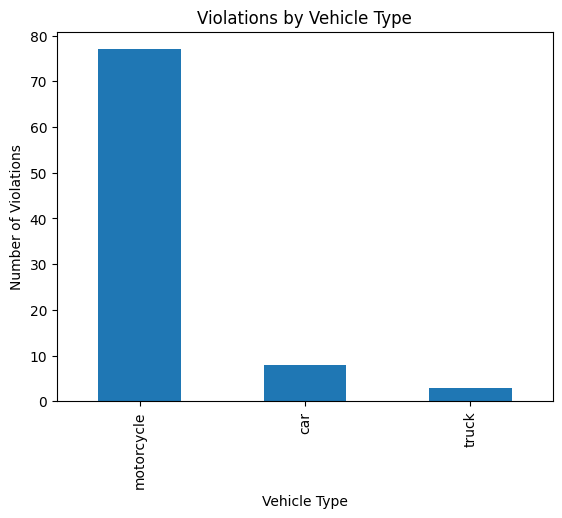

In [6]:
# -----------------------------
# Phase 8 – Cell 2
# Vehicle Type vs Violation Analysis
# -----------------------------

import pandas as pd
import matplotlib.pyplot as plt

# Load final violation records
VIOLATION_RECORDS_CSV = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violation_records/final_violation_records.csv"
df = pd.read_csv(VIOLATION_RECORDS_CSV)

# Count violations by vehicle type
vehicle_violation_counts = df["vehicle_type"].value_counts()

# Display counts
print("Violation Count by Vehicle Type:")
print(vehicle_violation_counts)

# Plot
plt.figure()
vehicle_violation_counts.plot(kind="bar")
plt.title("Violations by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Violations")
plt.show()


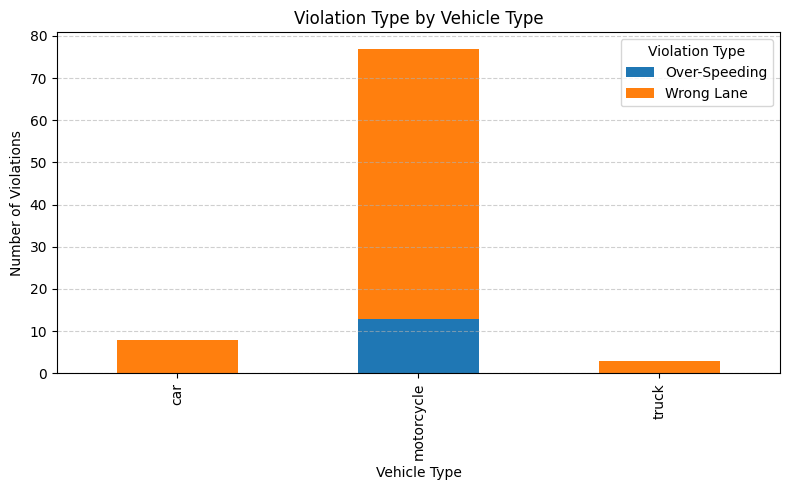

violation_type  Over-Speeding  Wrong Lane
vehicle_type                             
car                         0           8
motorcycle                 13          64
truck                       0           3

In [7]:
# Phase 8 – Cell 3
# Violation Type vs Vehicle Type Analysis

import pandas as pd
import matplotlib.pyplot as plt

# Load final violation records
FINAL_VIOLATION_CSV = "/content/drive/MyDrive/Smart_Traffic_Violation_Detection/outputs/violation_records/final_violation_records.csv"
df = pd.read_csv(FINAL_VIOLATION_CSV)

# Create pivot table
pivot_df = pd.pivot_table(
    df,
    index="vehicle_type",
    columns="violation_type",
    aggfunc="size",
    fill_value=0
)

# Plot stacked bar chart
pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5)
)

plt.title("Violation Type by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Violations")
plt.legend(title="Violation Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Display table
pivot_df
